
# TP : Traitement d'images avec Python (sans OpenCV)
## Objectif
Dans ce TP, vous allez implémenter manuellement différents algorithmes de traitement d'image, sans utiliser de fonctions intégrées provenant de bibliothèques comme OpenCV. Vous utiliserez principalement `NumPy` pour manipuler les tableaux et les matrices.

Nous allons explorer les concepts suivants :
1. Segmentation :
   - Seuiling d'image
   - Seuiling adaptatif
   - Segmentation par binarisation d'Otsu
   - Segmentation par remplissage et composantes connectées
   - Segmentation par K-means
   - Segmentation par soustraction de fond
   - Segmentation par transformation en ligne de partage des eaux
2. Template matching

Assurez-vous d'avoir `NumPy` et `matplotlib` installés :
```bash
!pip install numpy matplotlib scikit-image
```


In [ ]:
!pip install numpy matplotlib scikit-image


### Exercice 1a : Segmentation par seuiling d'image (implémentation manuelle)
**Description :** Le seuiling d'image est une technique de base où chaque pixel de l'image est comparé à un seuil fixe. Les pixels dont l'intensité est supérieure au seuil sont considérés comme faisant partie de l'objet, tandis que les autres appartiennent au fond.

**Algorithme :**
- Pour chaque pixel dans l'image, attribuez la valeur maximale (blanc) s'il dépasse le seuil, sinon attribuez la valeur minimale (noir).

Complétez le code ci-dessous pour implémenter le seuiling d'image.


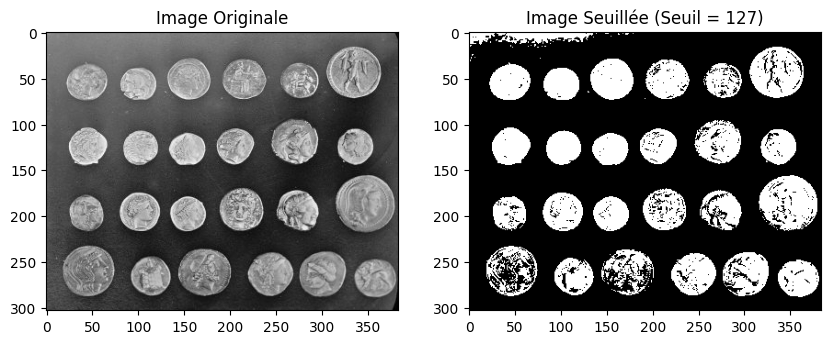

In [1]:

import numpy as np
import matplotlib.pyplot as plt
from skimage.data import *
import cv2

# Charger une image en niveaux de gris (grayscale)
# Remplacez 'image_path' par le chemin de votre image
image = coins()

# Implémentation manuelle du seuiling
def manual_threshold(image, threshold):
    # Créez une copie de l'image avec des valeurs modifiées selon le seuil
    image_copy = image.copy()
    # Mettez à 1 les valeurs supérieures au seuil
    image_copy = np.where(image_copy > threshold, 1, 0)
    return image_copy

# Appliquer le seuiling avec un seuil de 127
thresholded_image = manual_threshold(image, 127)

# Afficher l'image originale et l'image seuillée
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Image Originale')
plt.imshow(image, cmap='gray')

plt.subplot(1, 2, 2)
plt.title('Image Seuillée (Seuil = 127)')
plt.imshow(thresholded_image, cmap='gray')
plt.show()



### Exercice 1b : Segmentation par seuiling adaptatif (implémentation manuelle)
**Description :** Le seuiling adaptatif calcule le seuil pour chaque pixel basé sur les niveaux de gris de ses voisins locaux, ce qui le rend plus efficace pour les images avec des variations d'éclairage.

Complétez le code suivant pour implémenter manuellement le seuiling adaptatif.


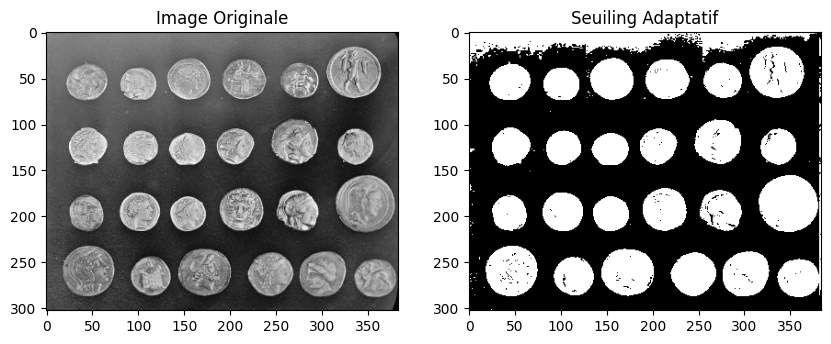

In [3]:

# Implémentation du seuiling adaptatif

def adaptative_mean_threshold(image, block_size):
    # Créez une copie de l'image avec des valeurs modifiées selon le seuil
    thresholded_image = np.zeros_like(image)
    # Parcourez l'image par blocs
    for i in range(0, image.shape[0], block_size):
        for j in range(0, image.shape[1], block_size):
            # Calculez la moyenne des valeurs du bloc
            block = image[i:i+block_size, j:j+block_size]
            # Calculate the mean of the block values
            block_mean = np.mean(block)
            # Mettez à 1 les valeurs supérieures à la moyenne
            thresholded_image[i:i+block_size, j:j+block_size] = np.where(block > block_mean, 1, 0)
    return thresholded_image
# Appliquer le seuiling adaptatif
adaptive_thresholded_image = adaptative_mean_threshold(image, 127)

# Afficher les résultats
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Image Originale')
plt.imshow(image, cmap='gray')

plt.subplot(1, 2, 2)
plt.title('Seuiling Adaptatif')
plt.imshow(adaptive_thresholded_image, cmap='gray')
plt.show()



### Exercice 1c : Segmentation par binarisation d'Otsu (implémentation manuelle)
**Description :** La méthode d'Otsu trouve le seuil optimal pour séparer les pixels en deux classes (objet et fond) en maximisant la variance inter-classe.

Complétez le code suivant pour implémenter manuellement la binarisation d'Otsu.


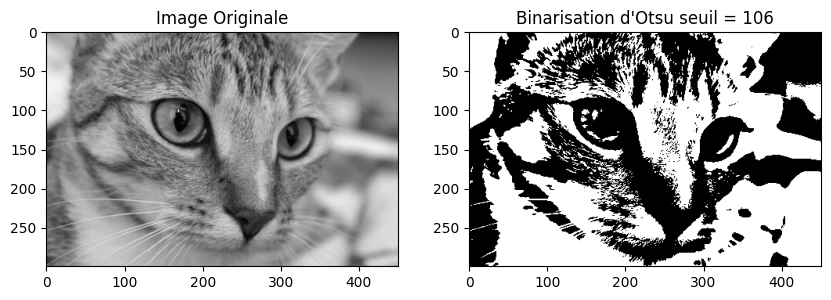

In [4]:

# Implémentation manuelle de la méthode d'Otsu
def compute_otsu_criteria(image, threshold):
    # Créez une copie de l'image avec des valeurs modifiées selon le seuil
    thresholded_image = image.copy()
    # Calculez les poids des classes
    # w1 = P(1) = nb de pixels de la classe 1 / nb de pixels total
    nb_pixels = image.size
    # Calculez le nombre de pixels de la classe 1 (valeurs zéro)
    nb_nonzeros = np.sum(image > threshold)
    # Calculez le poids de la classe 1
    w1 = nb_nonzeros / nb_pixels
    # w0 = P(0) = 1 - w1
    w0 = 1 - w1
    # Calculez la variance intra-classe
    if w0 == 0 or w1 == 0:
        return np.inf
    # Commencez par extraire les valeurs des pixels de chaque classe
    val_1 = image[image > threshold]
    val_0 = image[image <= threshold]
    
    # Calculez les variances intra-classe
    var0 = np.var(val_0) if len(val_0) > 0 else 0
    var1 = np.var(val_1) if len(val_1) > 0 else 0

    return w0 * var0 + w1 * var1

def otsu_threshold(image):
    # Générer une liste de seuils possibles
    threshold_range = threshold_range = np.arange(0, 256)
    # Calculer le critère d'Otsu pour chaque seuil
    criteria = [compute_otsu_criteria(image, t) for t in threshold_range]
    # Trouver le seuil optimal qui minimise le critère
    optimal_threshold = threshold_range[np.argmin(criteria)]
    return optimal_threshold
image = cat()
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# Appliquer la méthode d'Otsu sur l'image
optimal_threshold = otsu_threshold(image)
otsu_thresholded_image = manual_threshold(image, optimal_threshold)

# Afficher les résultats
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Image Originale')
plt.imshow(image, cmap='gray')

plt.subplot(1, 2, 2)
plt.title(f"Binarisation d'Otsu seuil = {optimal_threshold}")
plt.imshow(otsu_thresholded_image, cmap='gray')
plt.show()

### Exercice 1d : Segmentation par K-means
**Description :** La segmentation par K-means est une technique couramment utilisée en traitement d'images pour diviser une image en régions distinctes basées sur la similarité des pixels. Cette méthode regroupe les pixels de l'image en différentes classes (ou clusters) en fonction de leurs valeurs de couleur.

Complétez le code suivant pour implémenter la segmentation par K-means.

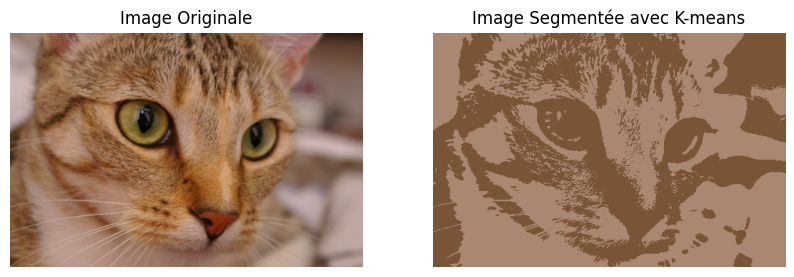

In [5]:
# Fonction pour effectuer le clustering K-means
def kmeans(X, n_clusters):
    # Etape 1: Initialiser les centroïdes aléatoirement à partir des points de données
    np.random.seed(0)  # Pour la reproductibilité
    initial_indices = np.random.choice(X.shape[0], n_clusters, replace=False)
    centroids = X[initial_indices]

    while True:
        # Etape 2: Assigner les clusters en fonction du centroïde le plus proche
        distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
        labels = np.argmin(distances, axis=1)

        # Etape 3: Calculer les nouveaux centroïdes
        new_centroids =  np.array([X[labels == i].mean(axis=0) for i in range(n_clusters)])
        
        # Si les centroïdes ne changent pas, sortir de la boucle
        if np.all(centroids == new_centroids):
            break
        
        # Sinon, mettre à jour les centroïdes
        centroids = new_centroids

    return labels, centroids

# Charger une image en couleur
astronaut_image = cat()
# Convertir l'image en un tableau 2D de pixels ==> (n_pixels, n_channels)
pixels = astronaut_image.reshape(-1, 3).astype(np.float32)

# Appliquer le clustering K-means avec 2 clusters
n_clusters = 2  # Nombre de clusters
labels, centroids = kmeans(pixels, n_clusters)

# Reconstruire l'image segmentée à partir des clusters i.e. (n_pixels, n_channels) ==> (n_rows, n_cols, n_channels)
segmented_image = centroids[labels].reshape(astronaut_image.shape).astype(np.uint8)

# Afficher l'image originale et l'image segmentée
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(astronaut_image)
plt.title('Image Originale')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(segmented_image)
plt.title('Image Segmentée avec K-means')
plt.axis('off')

plt.show()

### Exercice 2 : Template matching
**Description :** Le template matching est une technique de traitement d'images numériques qui permet de trouver des petites parties d'une image qui correspondent à une image modèle.

Complétez le code suivant pour implémenter le template matching.

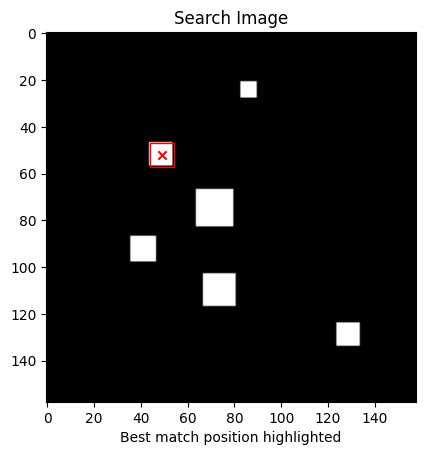

The best matching position is at row 47, column 44 with a minimum SAD of 0.0.


In [13]:
# Fonction pour effectuer la recherche de modèle en utilisant la somme des différences absolues (SAD)
def template_matching_sad(search_image, template_image):
    # Récupérer les dimensions de l'image de recherche et du modèle
    S_rows, S_cols = search_image.shape
    T_rows, T_cols = template_image.shape

    # Initialiser le SAD minimum et la meilleure position
    minSAD = np.inf
    best_position = None

    # Parcourir l'image de recherche
    for x in range(S_cols - T_cols + 1):
        for y in range(S_rows - T_rows + 1):
            sad = 0
            

            # Parcourir l'image modèle
            for j in range(T_cols):
                for i in range(T_rows):
                    pixel_search_img = search_image[x + i, y + j]
                    pixel_template_img = template_image[i, j]

                    # Calculer la différence absolue
                    sad += abs(pixel_search_img - pixel_template_img)

            # Sauvegarder la meilleure position trouvée avec le minimum de SAD
            if sad < minSAD:
                minSAD = sad
                best_position = (x, y)

    return best_position, minSAD
def crop_image(img, x, y, w, h):
    cropped_img = img[y:y+h, x:x+w]

    return cropped_img
# Creez une image noire de 128x128 avec des carres aleatoires
np.random.seed(0)  # Pour la reproductibilité
search_image = np.zeros((158, 158))

# Ajoutez quelques carrés aléatoires à l'image de recherche
for _ in range(5):
    top_left_x = np.random.randint(0, 123)
    top_left_y = np.random.randint(0, 123)
    shape = np.random.randint(5, 20)
    search_image[top_left_y:top_left_y+shape, top_left_x:top_left_x+shape] = 1
search_image[124:134, 124:134] = 1
# Créez une image modèle (carré de 10x10)
template_image = np.ones((10, 10))

# Recherche du modèle dans l'image de recherche
best_position, minSAD = template_matching_sad(search_image, template_image)

# Afficher l'image de recherche et la position du modèle
plt.imshow(search_image, cmap='gray')
plt.title('Search Image')
plt.scatter(best_position[1] + 5, best_position[0] + 5, color='red', marker='x')  # Marquer le centre du modèle
plt.gca().add_patch(plt.Rectangle((best_position[1], best_position[0]), 10, 10, linewidth=1, edgecolor='red', facecolor='none'))
plt.xlabel('Best match position highlighted')
plt.show()

print(f"The best matching position is at row {best_position[0]}, column {best_position[1]} with a minimum SAD of {minSAD}.")

### Exercice 3 : Stéganographie d'image
**Description :** La stéganographie est la technique de dissimuler un message à l'intérieur d'un support (texte, image, son, etc.) de manière à ce que sa présence ne soit pas évidente. Dans cet exercice, nous allons apprendre à cacher un message dans une image à l'aide d'un algorithme de stéganographie.

Complétez le code suivant pour implémenter la stéganographie pour cacher un message dans une image.

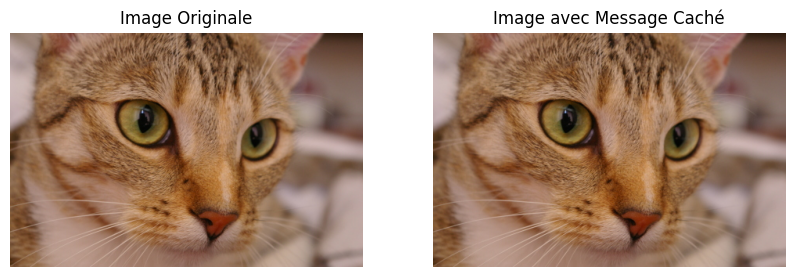

Message extrait : Ceci est un message secret.


In [45]:
from PIL import Image

# Fonction pour cacher un message dans une image
def hide_message(image, message):
    # Convertir le message en binaire
    message += '\0'  # Ajouter un caractère nul pour indiquer la fin du message
    message_bin = ''.join(format(ord(c), '08b') for c in message)

    # Convertir l'image en tableau de pixels
    img_array = np.array(image)
    rows, cols, _ = img_array.shape

    # Vérifier si l'image peut contenir le message
    if len(message_bin) > rows * cols:
        raise ValueError("Le message est trop long pour être caché dans l'image.")

    # Cacher le message dans les bits de poids faible des pixels
    index = 0
    for i in range(rows):
        for j in range(cols):
            # Si le message n'est pas encore entièrement caché
            if index < len(message_bin):
                # Modifier le bit de poids faible du pixel rouge
                img_array[i][j][0] = (img_array[i, j, 0] & ~1) | int(message_bin[index])
                index += 1
            else:
                break

    # Retourner l'image modifiée
    return Image.fromarray(img_array)

# Fonction pour extraire le message caché d'une image
def extract_message(image):
    img_array = np.array(image)
    message_bin = ""

    # Parcourir les pixels de l'image pour extraire les bits
    rows, cols, _ = img_array.shape
    for i in range(rows):
        for j in range(cols):
            # Extraire le bit de poids faible du pixel rouge
            message_bin += str(img_array[i][j][0] & 1)

    # Convertir les bits extraits en caractères
    message = ""
    for i in range(0, len(message_bin), 8):
        byte = message_bin[i:i+8]
        if byte == '00000000':  # Fin du message
            break
        message += chr(int(byte,2))

    return message

# Charger l'image "chat" depuis scikit-image
cat_image = cat()  # Charger l'image chat

# Cacher un message dans l'image
message = "Ceci est un message secret."
steg_image = hide_message(cat_image, message)

# Extraire le message de l'image modifiée
extracted_message = extract_message(steg_image)

# Affichage des résultats
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(cat_image)
plt.title('Image Originale')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(steg_image)
plt.title('Image avec Message Caché')
plt.axis('off')

plt.show()

print(f"Message extrait : {extracted_message}")

### Facile ? Essayez de cacher une image dans une autre à l'aide de la stéganographie.

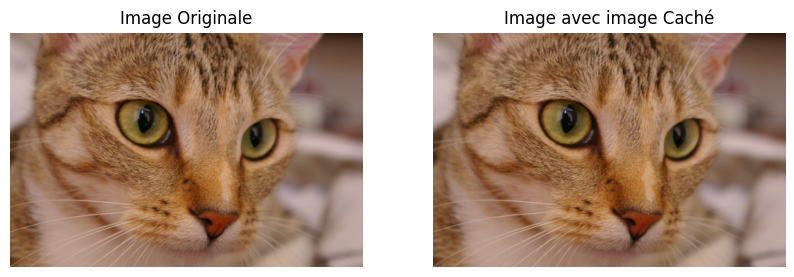

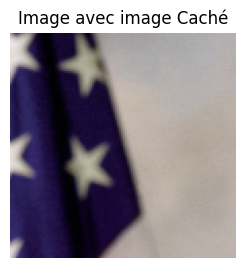

In [51]:
from PIL import Image

# Fonction pour cacher un message dans une image
def hide_image(image, image_cachee):
    # Convertir le message en binaire
    #image_cachee += '\0'  # Ajouter un caractère nul pour indiquer la fin du message
    image_cachee_array = np.array(image_cachee)
    image_bin = ''.join(format(pixel, '08b') for row in image_cachee_array for pixel in row.flatten())
    image_bin += ''.join(format(ord('\0'), '08b'))

    # Convertir l'image en tableau de pixels
    img_array = np.array(image)
    rows, cols, _ = img_array.shape

    # Vérifier si l'image peut contenir le message
    if len(image_bin) > rows * cols * 3:
        raise ValueError("Le message est trop long pour être caché dans l'image.")

    # Cacher le message dans les bits de poids faible des pixels
    index = 0
    for i in range(rows):
        for j in range(cols):
            for k in range(3):
                if index < len(image_bin):
                    img_array[i, j, k] = (img_array[i, j, k] & ~1) | int(image_bin[index])
                    index += 1
                else:
                    break

    # Retourner l'image modifiée
    return Image.fromarray(img_array)

# Fonction pour extraire le message caché d'une image
def extract_image(image,shape):
    img_array = np.array(image)
    image_bin = ""

    # Parcourir les pixels de l'image pour extraire les bits
    rows, cols, _ = img_array.shape
    for i in range(rows):
        for j in range(cols):
            for k in range(3):
                # Extraire le bit de poids faible du pixel rouge
                image_bin += str(img_array[i][j][k] & 1)

    # Convertir les bits extraits en caractères
    image = np.zeros(shape,dtype=np.uint8)
    index=0
    for i in range(shape[0]):
        for j in range(shape[1]):
            for k in range(3):
                
            
                if index < len(image_bin):
                    byte = image_bin[index:index+8]
                    image[i, j, k] = int(byte, 2)
                    index += 8
        

    return image

# Charger l'image "chat" depuis scikit-image
cat_image = cat()  # Charger l'image chat
def crop_image(img, x, y, w, h):
    # Crop the image using the specified coordinates
    cropped_img = img[y:y+h, x:x+w]

    return cropped_img
# Cacher un message dans l'image
from skimage.data import astronaut
image = crop_image(astronaut(), 0, 0, 110, 110)
steg_image = hide_image(cat_image, image)

# Extraire le message de l'image modifiée
extracted_image = extract_image(steg_image, image.shape)

# Affichage des résultats
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(cat_image)
plt.title('Image Originale')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(steg_image)
plt.title('Image avec image Caché')
plt.axis('off')

plt.show()

plt.subplot(1, 2, 2)
plt.imshow(extracted_image)
plt.title('Image avec image Caché')
plt.axis('off')

plt.show()